# How to Win in the Data Science Field

## A. Business Understanding

This project aims to answer the question: "How does one win in the Data Science field?"


To gain insight on this main inquiry, I focused on addressing the following:

- Are there major differences in salary among the different data science roles?
- What are the essential technical skills to do well in data science?
- Does educational background play a huge part?
- How much does continuous learning on online platforms help?

## B. Data Understanding

For this project I have chosen to use the 2019 Kaggle ML & DS Survey raw data. I think this is a good dataset choice for the following reasons:

- The Kaggle Community is the biggest data science and machine learning community, therefore would have a good representation of data scientist professionals. 
- It features a lot of relevant variables, from salary, demographics, to characteristics and habits of data science professionals in the community.

### Data Access and Exploration

The first step is to import all the needed libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
%matplotlib inline

We then import the dataset to be used for the analysis.

In [2]:
# Import data
df = pd.read_csv('./multiple_choice_responses.csv')
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,Q13_Part_12,Q13_OTHER_TEXT,Q14,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q14_OTHER_TEXT,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_OTHER_TEXT,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_Part_12,Q17_OTHER_TEXT,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10,Q18_Part_11,Q18_Part_12,Q18_OTHER_TEXT,Q19,Q19_OTHER_TEXT,Q20_Part_1,Q20_Part_2,Q20_Part_3,Q20_Part_4,Q20_Part_5,Q20_Part_6,Q20_Part_7,Q20_Part_8,Q20_Part_9,Q20_Part_10,Q20_Part_11,Q20_Part_12,Q20_OTHER_TEXT,Q21_Part_1,Q21_Part_2,Q21_Part_3,Q21_Part_4,Q21_Part_5,Q21_OTHER_TEXT,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_Part_8,Q24_Part_9,Q24_Part_10,Q24_Part_11,Q24_Part_12,Q24_OTHER_TEXT,Q25_Part_1,Q25_Part_2,Q25_Part_3,Q25_Part_4,Q25_Part_5,Q25_Part_6,Q25_Part_7,Q25_Part_8,Q25_OTHER_TEXT,Q26_Part_1,Q26_Part_2,Q26_Part_3,Q26_Part_4,Q26_Part_5,Q26_Part_6,Q26_Part_7,Q26_OTHER_TEXT,Q27_Part_1,Q27_Part_2,Q27_Part_3,Q27_Part_4,Q27_Part_5,Q27_Part_6,Q27_OTHER_TEXT,Q28_Part_1,Q28_Part_2,Q28_Part_3,Q28_Part_4,Q28_Part_5,Q28_Part_6,Q28_Part_7,Q28_Part_8,Q28_Part_9,Q28_Part_10,Q28_Part_11,Q28_Part_12,Q28_OTHER_TEXT,Q29_Part_1,Q29_Part_2,Q29_Part_3,Q29_Part_4,Q29_Part_5,Q29_Part_6,Q29_Part_7,Q29_Part_8,Q29_Part_9,Q29_Part_10,Q29_Part_11,Q29_Part_12,Q29_OTHER_TEXT,Q30_Part_1,Q30_Part_2,Q30_Part_3,Q30_Part_4,Q30_Part_5,Q30_Part_6,Q30_Part_7,Q30_Part_8,Q30_Part_9,Q30_Part_10,Q30_Part_11,Q30_Part_12,Q30_OTHER_TEXT,Q31_Part_1,Q31_Part_2,Q31_Part_3,Q31_Part_4,Q31_Part_5,Q31_Part_6,Q31_Part_7,Q31_Part_8,Q31_Part_9,Q31_Part_10,Q31_Part_11,Q31_Part_12,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,"30,000-39,999",$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)","Journal Publications (traditional publications, preprint journals, etc)",NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,NaN,Kaggle Courses (i.e. Kaggle Learn),NaN,Udemy,NaN,NaN,NaN,NaN,-1,"Basic statistical software (Microsoft Excel, Google Sheets, etc.)",0,-1,-1,-1,-1,-1,1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",RStudio,PyCharm,NaN,MATLAB,NaN,Spyder,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,Python,R,SQL,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB,NaN,NaN,-1,Python,-1,NaN,Matplotlib,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,CPUs,GPUs,NaN,NaN,NaN,-1,Never,1-2 years,Linear or Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,

In [3]:
df.shape

(19717, 246)

There was a total of 19.7K data science professionals in the survey, and 246 fields corresponding to their responses to the survey. There are missing values, but we'll deal with them later depending on the analysis that will be implemented.

## C. Preparing the Data

### Cleaning the data

We do some necessary filtering to the data with the following rationale:
- Filtering among professionals / employed only because we are concerned about salary outcomes
- Focusing among US residents only to lessen the variation in pay due to region
- Focusing among professionals with salary >=30K USD only to most likely capture full-time employees

In [4]:
# Filter data among professionals only
df = df[~df.Q5.isin(['Student', 'Not employed']) & df.Q5.notnull()]

# Filter data among residents of the US only
df = df[df.Q3.isin(['United States of America'])]

# Filter data among annual salary of >=30K
df = df[~df.Q10.isin(['$0-999','1,000-1,999','2,000-2,999','3,000-3,999','4,000-4,999','5,000-7,499','7,500-9,999','10,000-19,999','20,000-29,999']) & df.Q10.notnull()]

# Recode some of the salary bins
df.loc[df['Q10'].isin(['300,000-500,000','> $500,000']), 'Q10'] = '>= $300,000'

# Shape of the dataframe
df.shape

(2013, 246)

From these filtering, we get the final sample size of 2,013 US Data Science Professionals, earning an annual wage of >=30K USD. 

### Missing Values

As this analysis is highly descriptive and I will not employ any statistical modelling, I will address the missing values by simply dropping them from the computed percentages. 

### Function Creation

I created a few helper functions for charts to be used all throughout the analysis.

Most of my charts are going to be bar plots and heatmaps. I created the functions depending on the data type (single respons and multiple response variables.

In [5]:
def barplots_single_answer(q_number, x_title, y_title, chart_title, order=None):
    '''
    INPUT:
    q_number - question number for the variable of interest. It should be a single-answer question.
    x_title - desired title of the x-axis
    y_title - desired title of the y-axis
    chart_title - desired main title
    order_rows - desired sorting of the rows (will default to descending according to frequency of answers)

    OUTPUT:
    A barplot that shows the frequency in % for the variable of interest
    
    This function prepares the data for the visualization and draws the bar plot.
    '''        
    cat_values = round((df[pd.notnull(df[q_number])][q_number].value_counts()/len(df[pd.notnull(df[q_number])][q_number])) * 100,1)
    cat_values = cat_values.reset_index().rename(columns = {'index':q_number, q_number:'pct'}) 
    f, ax = plt.subplots(figsize=(8,8))
    sns.barplot(x = 'pct', y = q_number, data=cat_values, color='dodgerblue', order=order)
    ax.set_xlabel(x_title)
    ax.set_ylabel(y_title)
    plt.title(chart_title, fontsize = 14, fontweight ='bold')
    print(cat_values)

def barplots_heatmap_single_answer(q_number, bar_chart_title, heatmap_title, order_rows = False):
    '''
    INPUT:
    q_number - question number for the variable of interest. It should be a single-answer question.
    bar_chart_title - desired title of the frequency bar chart
    heatmap_title - desired title of the heatmap chart
    order_rows - desired sorting of the rows (will default to descending according to frequency of answers)

    OUTPUT:
    Two charts: A barplot that shows the frequency in % for the variable of interest, and a heatmap
    that visually correlates the variable of interest with salary range.
    Table reference for the percentages
    
    This function prepares the data for the visualization and provides the two visualizations specified.
    '''        
    # Value count for the variable of interest
    cat_values = df[pd.notnull(df[q_number])][q_number].value_counts()
    # Set a threshold of 20 records for category to be included in plotting, otherwise it will distort the normalized heatmap 
    cat_values = cat_values[cat_values>=20]
    cat_values = round((cat_values/len(df[pd.notnull(df[q_number])][q_number])) * 100,1)
    if(order_rows == False):
        cat_values = cat_values
    else:
        cat_values = cat_values.reindex(index = order_rows) 
    cat_values = cat_values.reset_index().rename(columns = {'index':q_number, q_number:'pct'}) 

    # Sort order for the salary bins
    order_col = ['30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999',
                 '80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999',
                 '150,000-199,999','200,000-249,999', '250,000-299,999','>= $300,000']
    y_labels = cat_values[q_number]
        
    # Crosstabs for the salary and variable of interest
    crosstab = pd.crosstab(df[q_number],df['Q10'], normalize='index')
    crosstab = crosstab.reindex(order_col, axis="columns")    
    if(order_rows == False):
        crosstab = crosstab.reindex(y_labels, axis="rows")
    else:
        crosstab = crosstab.reindex(order_rows, axis="rows")        

    # Set-up subplots
    fig = plt.figure(figsize=(14,6))
    grid = plt.GridSpec(1, 10, wspace=10, hspace=1)
    plt.subplot(grid[0, :3])
    
    # Left plot (barplot)
    ax1 = sns.barplot(x = 'pct', y = q_number, data=cat_values, color='dodgerblue', order=None)
    plt.title(bar_chart_title, fontsize = 14, fontweight ='bold')
    ax1.set_xlabel('Percentage %')
    ax1.set_ylabel('')    
    # Text-wrapping of y-labels
    f = lambda x: textwrap.fill(x.get_text(), 27)
    ax1.set_yticklabels(map(f, ax1.get_yticklabels()))
    
    # Right plot (heatmap)
    plt.subplot(grid[0, 4:])
    ax2 = sns.heatmap(crosstab, cmap="Blues", cbar=False)
    plt.title(heatmap_title, fontsize = 14, fontweight ='bold')
    ax2.set_xlabel('Yearly Salary')
    ax2.set_ylabel('')
    ax2.set_yticklabels(map(f, ax2.get_yticklabels()))
    
    print(cat_values)

def barplots_heatmap_multi_answer(multi_question_list, bar_chart_title, heatmap_title, order_rows = False):
    '''
    INPUT:
    multi_question_list - a list of fields containing the response for a multiple answer-type question
    bar_chart_title - desired title of the frequency bar chart
    heatmap_title - desired title of the heatmap chart
    order_rows - desired sorting of the rows (will default to descending according to frequency of answers)

    OUTPUT:
    Two charts: A barplot that shows the frequency in % for the variable of interest, and a heatmap
    that visually correlates the variable of interest with salary range.
    Table reference for the percentages
    
    This function prepares the data for the visualization and provides the two visualizations specified.
    '''        
    multi_question = multi_question_list

    df_store = []
    
    for question in (multi_question):
        df_temp = df[question].value_counts()
        df_store.append(df_temp)
    df_multi = pd.concat(df_store)
    df_multi = pd.DataFrame(df_multi).reset_index().rename(columns = {'index':multi_question[0], 0:'pct'}) 
    df_multi = df_multi[df_multi['pct']>=20]
    df_multi['pct'] = round(df_multi['pct']/sum(df_multi['pct']) * 100,1)
    if(order_rows == False):
        df_multi = df_multi.sort_values('pct', ascending=False)
    else:
        df_multi = df_multi.reindex(index = order_rows) 
 
    # Sort order for the salary bins
    order_col = ['30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999',
                 '80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999',
                 '150,000-199,999','200,000-249,999', '250,000-299,999','>= $300,000']
    y_labels = df_multi[multi_question[0]]

    # Crosstabs for the salary and variable of interest
    df_store_xtab = []
    for question in (multi_question):
        df_temp_xtab = pd.crosstab(df[question],df['Q10'], normalize='index')
        df_store_xtab.append(df_temp_xtab)
    df_multi_xtab = pd.concat(df_store_xtab)    
    
    df_multi_xtab = df_multi_xtab.reindex(order_col, axis="columns")    
    
    if(order_rows == False):
        df_multi_xtab = df_multi_xtab.reindex(y_labels, axis="rows")
    else:
        df_multi_xtab = df_multi_xtab.reindex(order_rows, axis="rows")        

    # Set-up subplots
    #fig = plt.figure(figsize=(14,6))
    fig = plt.figure(figsize=(14,8))
    grid = plt.GridSpec(1, 10, wspace=10, hspace=1)
    plt.subplot(grid[0, :3])
    
    # Left plot (barplot)
    ax1 = sns.barplot(x = 'pct', y = multi_question[0], data=df_multi, color='dodgerblue', order=None)
    plt.title(bar_chart_title, fontsize = 14, fontweight ='bold')
    ax1.set_xlabel('Percentage %')
    ax1.set_ylabel('')    
    # Text-wrapping of y-labels
    f = lambda x: textwrap.fill(x.get_text(), 27)
    ax1.set_yticklabels(map(f, ax1.get_yticklabels()))
    
    # Right plot (heatmap)
    plt.subplot(grid[0, 4:])
    ax2 = sns.heatmap(df_multi_xtab, cmap="Blues", cbar=False)
    plt.title(heatmap_title, fontsize = 14, fontweight ='bold')
    ax2.set_xlabel('Yearly Salary')
    ax2.set_ylabel('')
    ax2.set_yticklabels(map(f, ax2.get_yticklabels()))
    
    print(df_multi)    

## D. Analysis

### Question 1: Are there major differences in salary among the different data science roles?

We first look at the salary distribution of the sample. Most of the data science professionals have salaries that fall within the $100K-200K range.

#### Chart 1: Salary Distribution (Q10) - Bar Chart

                Q10   pct
0   100,000-124,999  18.4
1   150,000-199,999  16.5
2   125,000-149,999  15.7
3     90,000-99,999   7.4
4     80,000-89,999   7.2
5     70,000-79,999   7.0
6   200,000-249,999   6.1
7     60,000-69,999   4.9
8     50,000-59,999   4.0
9       >= $300,000   3.9
10    40,000-49,999   2.4
11  250,000-299,999   2.1
12    30,000-39,999   1.6
13    25,000-29,999   0.8
14    15,000-19,999   0.8
15    20,000-24,999   0.7
16    10,000-14,999   0.7


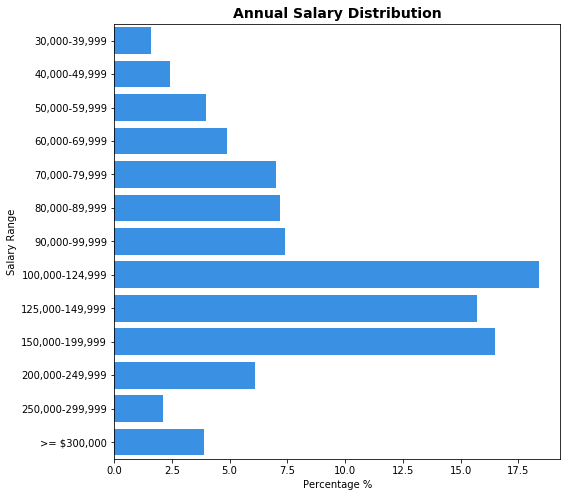

In [6]:
barplots_single_answer('Q10', 'Percentage %', 'Salary Range', 'Annual Salary Distribution',
               ['30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999',
                '80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999',
                 '150,000-199,999','200,000-249,999', '250,000-299,999','>= $300,000'])

#### Chart 2: Data Practitioners Distribution (Q5) - Bar Chart

                        Q5   pct
0           Data Scientist  34.0
1                    Other  14.0
2        Software Engineer  13.5
3             Data Analyst  12.0
4       Research Scientist   8.9
5  Product/Project Manager   5.8
6            Data Engineer   4.6
7         Business Analyst   4.2
8             Statistician   1.8
9    DBA/Database Engineer   1.1


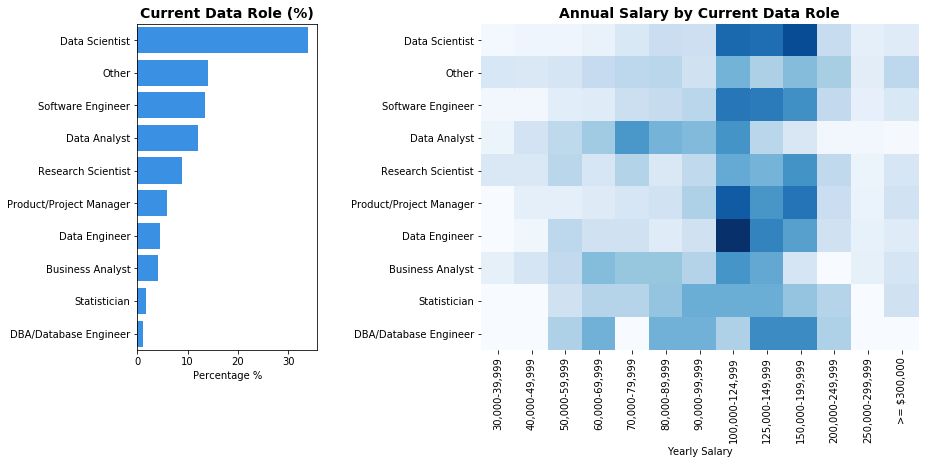

In [7]:
barplots_heatmap_single_answer('Q5', 'Current Data Role (%)', 'Annual Salary by Current Data Role')

Interpretation: 

- Data Scientists are heavy on the 100K-200K USD range which reflects our entire Kaggler sample. This makes sense because Data Scientist is the top profession at 34%.
- There is an obvious discrepancy between a data scientist and a data analyst salary, with the former showing a heavier concentration on the 100K-200K USD range, and the latter somewhere within 60K-125K. It seems that data scientists are paid much more than analysts.
- Other professions such as Statisticians and Database Engineers tend to have more variation in pay, while Data Engineers are more concentrated in the 120K-125K range.

### Question 2: What are the essential technical skills to do well in data science?

While the questionnaire is very detailed in terms of the technical skills asked among the Kagglers, I decided to focus on a few main items (so as not to bore the readers):
- "What programming languages do you use on a regular basis?" 
- From the above question, I derive how many programming languages they regularly use
- Primary data analysis tools used

#### Chart 3: Programming Languages Used 

    Q18_Part_1   pct
0       Python  30.3
2          SQL  22.2
1            R  15.3
8         Bash   8.6
6   Javascript   5.5
11       Other   5.0
5         Java   3.8
4          C++   3.6
9       MATLAB   2.7
3            C   2.1
7   TypeScript   1.1


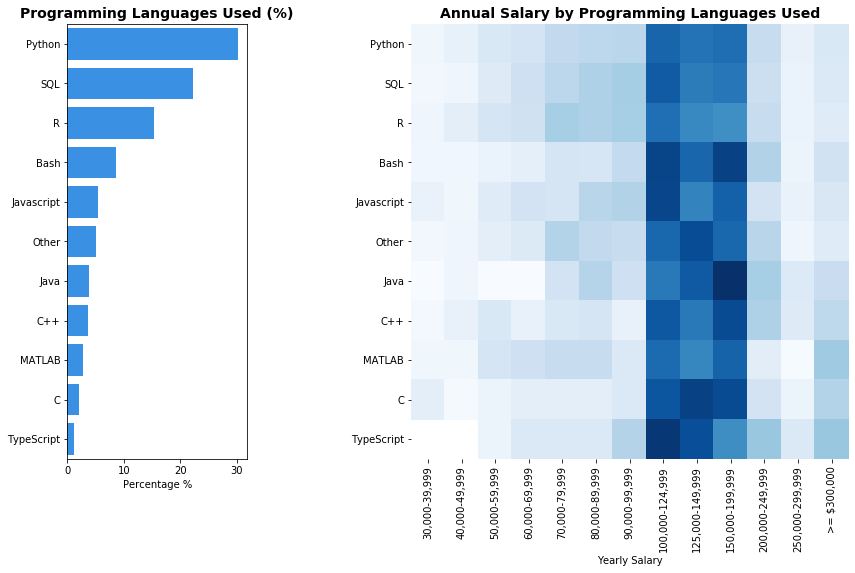

In [8]:
barplots_heatmap_multi_answer(['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_Part_7', 'Q18_Part_8',
                 'Q18_Part_9', 'Q18_Part_10', 'Q18_Part_11', 'Q18_Part_12'], 
                              'Programming Languages Used (%)', 
                              'Annual Salary by Programming Languages Used', 
                              order_rows = False)

Interpretation: 
- Python is the most popular language; SQL and R are also popular
- Software engineering-oriented languages such as Java, C++, and C have more dense representation in the 150K-200K range. 
- Other noteworthy languages that relate to higher pay are Matlab, Typescript, and Bash.

I also looked at the percentage of the sample who do not code at all:

In [9]:
# How many do not code at all?
df['Q18_Part_11'].value_counts()/len(df)*100

None    0.645802
Name: Q18_Part_11, dtype: float64

Only a small subset of the population does not code, which is not surprising given that these are Kagglers. 

I also ran an analysis to check how many programming languages do these data science professionals use:

In [11]:
lang_list = ['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_Part_7', 'Q18_Part_8',
                 'Q18_Part_9', 'Q18_Part_10','Q18_Part_12']
order_col = ['30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999','70,000-79,999',
            '80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999',
            '150,000-199,999','200,000-249,999', '250,000-299,999','>= $300,000']

df['Count_Languages'] = df[lang_list].apply(lambda x: x.count(), axis=1)

# Group by salary range, get the average count of programming language used
table_lang_salary = df[['Count_Languages','Q10']].groupby(['Q10']).mean()
table_lang_salary = table_lang_salary.reindex(order_col, axis="rows").reset_index()

# Average number of programming languages used
table_lang_salary['Count_Languages'].mean()

2.421288353180935

On the average, they use 2-3 languages. 

But how does this correlate with salary? To answer this question, I created this bar chart:

#### Chart 4: Number of Programming Languages Used

Text(0, 0.5, 'Annual Salary Range')

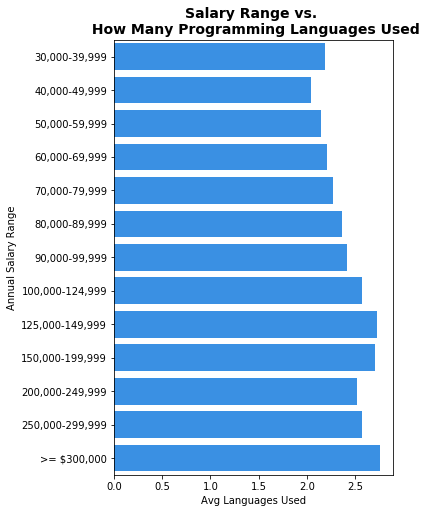

In [12]:
f, ax = plt.subplots(figsize=(5,8))

ax = sns.barplot(x='Count_Languages', y="Q10", 
                 data=table_lang_salary, color='dodgerblue')

plt.title('Salary Range vs. \n How Many Programming Languages Used', fontsize = 14, fontweight ='bold')
ax.set_xlabel('Avg Languages Used')
ax.set_ylabel('Annual Salary Range') 

Interpretation:

Plotting the number of languages used according to salary range, we see that the number of languages used tend to increase as pay increases — up to the 125K-150K point. So yes, it may be worth learning more than 1.

Apart from coding, I also looked at other tools that data science professionals use based on this question:

"What is the primary tool that you use at work or school to analyze data?"

#### Chart 5: Primary Data Analysis Tools 

                                                                    Q14   pct
0            Local development environments (RStudio, JupyterLab, etc.)  51.3
1              Cloud-based data software & APIs (AWS, GCP, Azure, etc.)  12.4
2     Basic statistical software (Microsoft Excel, Google Sheets, etc.)  11.9
3  Business intelligence software (Salesforce, Tableau, Spotfire, etc.)   9.2
4                       Advanced statistical software (SPSS, SAS, etc.)   8.0
5                                                                 Other   7.2


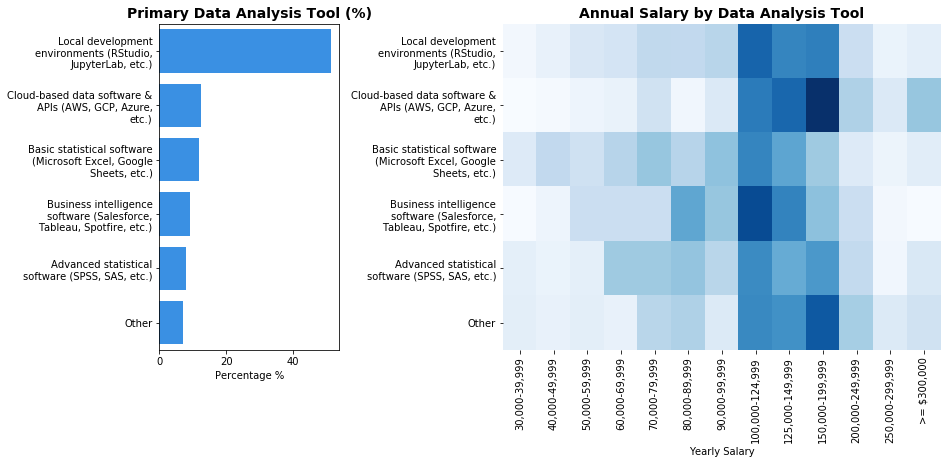

In [13]:
barplots_heatmap_single_answer('Q14', 'Primary Data Analysis Tool (%)', 'Annual Salary by Data Analysis Tool')

Interpretation: 

- Local development environments are the most popular tools with half of the sample using it. 
- Cloud-based software users have a large salary leverage though - those who use it appear to have a higher earning potential, most likely at 150K-200K, and even a high concentration of professionals earning more than 300K USD.
- There is a large variation in pay among basic and advanced statistical software users.

### Question 3: Does educational background play a huge part?

#### Chart 6. Highest level of educational attainment (Q4) - Bar chart and salary heatmap side by side

                                                                  Q4   pct
0                                                    Doctoral degree  22.4
1                                                    Master’s degree  49.3
2                                                Professional degree   1.3
3                                                  Bachelor’s degree  22.8
4  Some college/university study without earning a bachelor’s degree   3.5


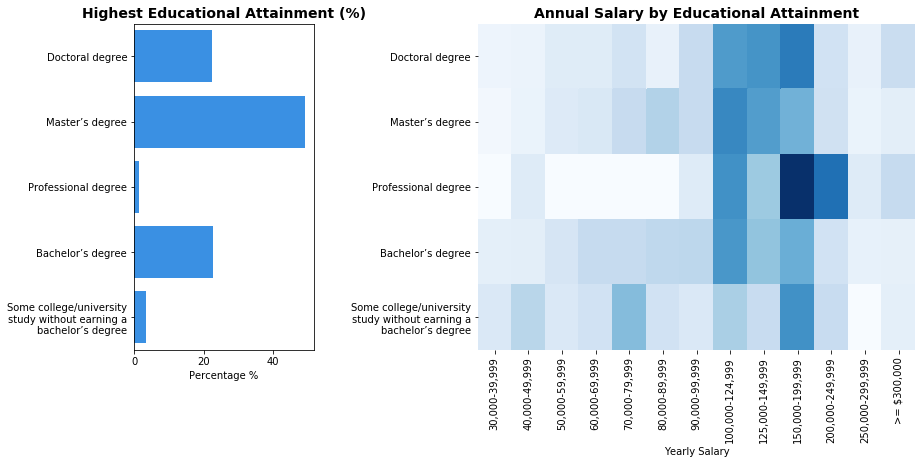

In [14]:
barplots_heatmap_single_answer('Q4', 'Highest Educational Attainment (%)', 'Annual Salary by Educational Attainment',
                               order_rows=['Doctoral degree', 'Master’s degree', 'Professional degree', 'Bachelor’s degree',
                                           'Some college/university study without earning a bachelor’s degree'])

Interpretation:

- Data science professionals tend to be a highly educated group, with 72% having either a Master’s Degree or a PhD. 
- The salary heatmaps do not really show anything remarkable, except that Professional Degrees have a high concentration in the 150K-250K USD bracket. This group only constitutes 1.3% of the sample, hence I would say this is inconclusive.

### Question 4: How much does continuous learning on online platforms help?

To answer this question, I referred to these items in the survey:
- "On which platforms have you begun or completed data science courses?"
- "Who/what are your favorite media sources that report on data science topics?"

First, I looked at the online platforms and computed for the percentage of those who learned through this medium (excluding formal university education):

In [15]:
# Compute for Percentage of Kagglers who learned through online platforms
platform_list = ['Q13_Part_1', 'Q13_Part_2', 'Q13_Part_3', 'Q13_Part_4', 'Q13_Part_5', 'Q13_Part_6', 
            'Q13_Part_7', 'Q13_Part_8', 'Q13_Part_9', 'Q13_Part_12']

df['Count_Platform'] = df[platform_list].apply(lambda x: x.count(), axis=1)

len(df[df['Count_Platform'] > 0]) / len(df['Count_Platform'])

0.8256333830104322

Interpretation: A stunning majority or 82% learn data science from these platforms.

On the specific online platforms:

#### Chart 7. Platforms where learn data science (Q13) - Bar chart and salary heatmap side by side

                            Q13_Part_1   pct
1                             Coursera  25.3
3                             DataCamp  12.2
7                                Udemy  11.9
5   Kaggle Courses (i.e. Kaggle Learn)  11.8
0                              Udacity  10.2
2                                  edX   9.5
6                              Fast.ai   5.2
8                    LinkedIn Learning   4.9
9                                 None   3.9
10                               Other   3.2
4                            DataQuest   1.9


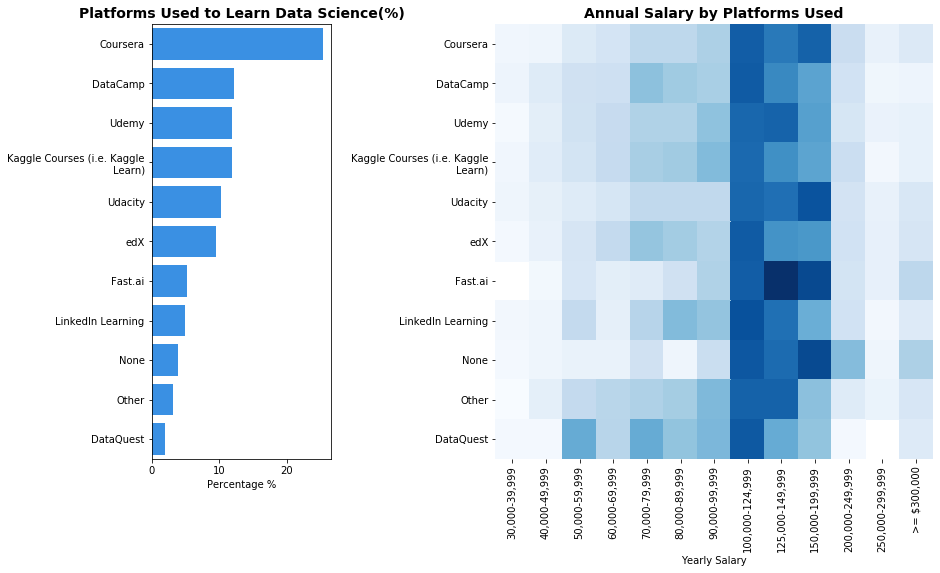

In [16]:
barplots_heatmap_multi_answer(['Q13_Part_1', 'Q13_Part_2', 'Q13_Part_3', 'Q13_Part_4', 'Q13_Part_5', 'Q13_Part_6', 
                               'Q13_Part_7', 'Q13_Part_8', 'Q13_Part_9', 'Q13_Part_11', 'Q13_Part_12'], 
                              'Platforms Used to Learn Data Science(%)', 
                              'Annual Salary by Platforms Used')

Interpretation:

- Coursera is by far the most popular, followed by Datacamp, Udemy, and Kaggle Courses.
- Interestingly, Fast.ai skewed heavily on the higher income levels 125K-150K. 
- DataQuest on the other hand are much more spread over the lower and middle income levels, which suggests that beginners tend to use this site more.

Apart from online courses, I also looked at other online media sources based on this question:

"Who/what are your favorite media sources that report on data science topics?"

#### Chart 8. Favorite Media Sources (Q12) - Bar chart and salary heatmap side by side

                                                                 Q12_Part_1   pct
7     Blogs (Towards Data Science, Medium, Analytics Vidhya, KDnuggets etc)  20.9
3                                  Kaggle (forums, blog, social media, etc)  16.9
8   Journal Publications (traditional publications, preprint journals, etc)  10.4
5                           YouTube (Cloud AI Adventures, Siraj Raval, etc)   9.6
2                            Reddit (r/machinelearning, r/datascience, etc)   8.7
0                                        Twitter (data science influencers)   7.8
6                Podcasts (Chai Time Data Science, Linear Digressions, etc)   7.0
4                                       Course Forums (forums.fast.ai, etc)   5.9
1                               Hacker News (https://news.ycombinator.com/)   4.9
9                              Slack Communities (ods.ai, kagglenoobs, etc)   4.4
11                                                                    Other   2.5
10              

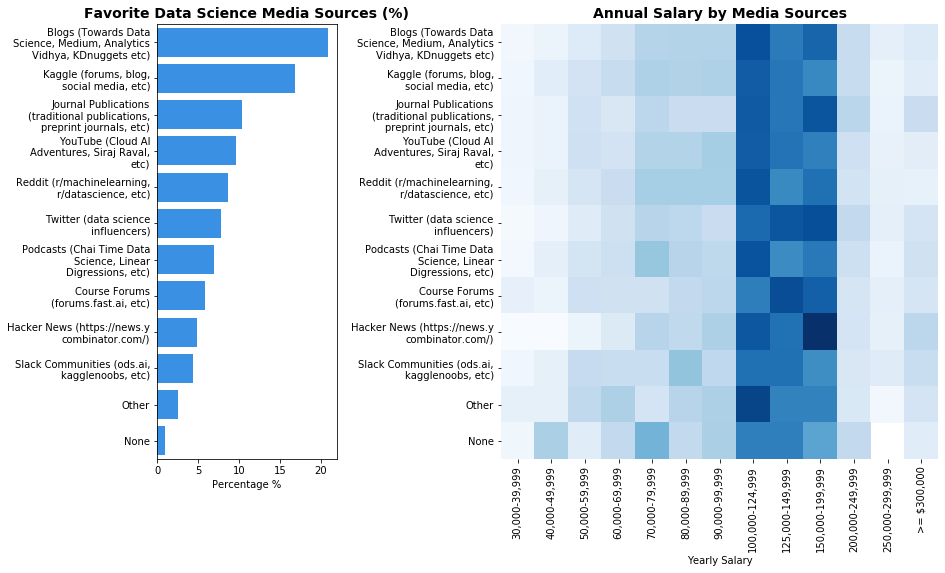

In [17]:
barplots_heatmap_multi_answer(['Q12_Part_1', 'Q12_Part_2', 'Q12_Part_3', 'Q12_Part_4', 'Q12_Part_5', 'Q12_Part_6', 
                               'Q12_Part_7', 'Q12_Part_8', 'Q12_Part_9', 'Q12_Part_10', 'Q12_Part_11', 'Q12_Part_12'], 
                              'Favorite Data Science Media Sources (%)', 
                              'Annual Salary by Media Sources', 
                              order_rows = False)

Interpretation: 
- Blogs are most popular with 21% choosing this as their favorite data science topic source.
- I did not see much pattern from the salary heatmap — most are just bunched within the 100K-200K USD range. 
- Curiously, Hacker News appears to have more followers on the higher end with 150K-200K salaries.

## Conclusion

### To win in the data science field (AND if you define winning as having a high pay):

- Code! Learning more languages will probably help. Apart from Python and R consider adding other non-data science languages such as C++, Java, and Typescript into your toolkit.
- Cloud-based technologies are worth learning. Get ready to explore those AWS, GCP, and Azure platforms for big data.
- Continuously upskill and update through MOOCs and online courses, and through media such as blogs and technology news.